In [19]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [20]:
# Membaca file Excel
file_path = "Data_Cuaca_Bersih.xlsx"
df = pd.read_excel(file_path)

In [21]:
# Memilih kolom tempmax dan tempmin
data = df[['tempmax', 'tempmin']]

In [22]:
# Scaling menggunakan Min-Max Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

Silhouette Score (num_components=2): 0.32422138482991714


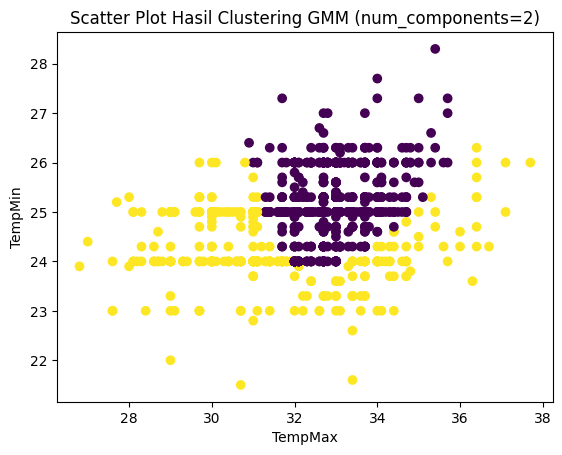

Silhouette Score (num_components=3): 0.32460686677351647


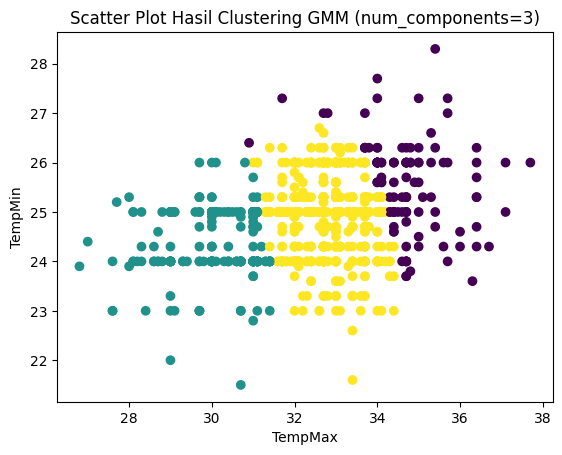

Silhouette Score (num_components=4): 0.23162912616883433


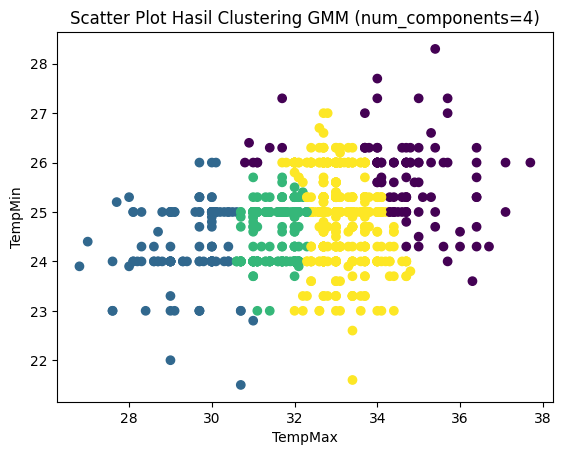

Silhouette Score (num_components=5): 0.16472131628154682


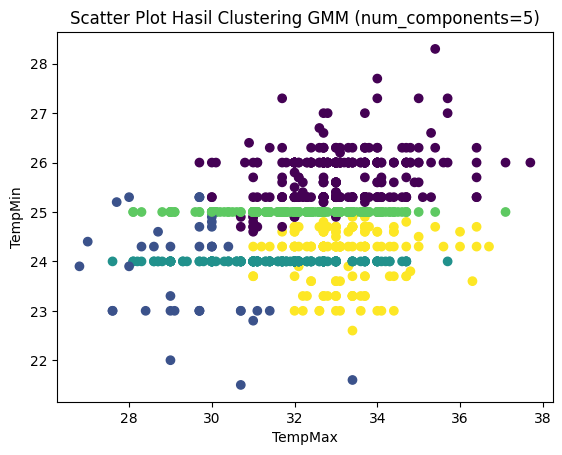

In [23]:
# Loop untuk mencoba nilai num_components dari 2 hingga 5
for num_components in range(2, 6):
    # Melakukan Gaussian Mixture Model clustering
    gmm = GaussianMixture(n_components=num_components, random_state=42)
    df['cluster'] = gmm.fit_predict(data_scaled)

    # Menilai performa clustering menggunakan Silhouette Score
    silhouette_avg = silhouette_score(data_scaled, df['cluster'])
    print(f"Silhouette Score (num_components={num_components}): {silhouette_avg}")

    # Menyimpan hasil clustering ke dalam file Excel
    output_file_path = f"Data_Cuaca_Bersih_Clustered_GMM_{num_components}.xlsx"
    df.to_excel(output_file_path, index=False)

    # Menampilkan dan menyimpan scatter plot hasil clustering
    plt.scatter(df['tempmax'], df['tempmin'], c=df['cluster'], cmap='viridis')
    plt.title(f'Scatter Plot Hasil Clustering GMM (num_components={num_components})')
    plt.xlabel('TempMax')
    plt.ylabel('TempMin')
    plt.savefig(f'Scatter_Plot_Clustered_GMM_{num_components}.png')
    plt.show()
